In [1]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [3]:
base_dir = r"C:\Users\DELL\Documents\Python\Data"

In [4]:
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

In [5]:
train_plain_dir = os.path.join(train_dir,'plain')
train_pothole_dir = os.path.join(train_dir,'pothole')

In [6]:
test_plain_dir = os.path.join(test_dir,'plain')
test_pothole_dir = os.path.join(test_dir,'pothole')

In [7]:
validation_plain_dir = os.path.join(validation_dir,'plain')
validation_pothole_dir = os.path.join(validation_dir,'pothole')

In [8]:
# Sanity checks
print('total training plain images:', len(os.listdir(train_plain_dir)))
print('total training pothole images:', len(os.listdir(train_pothole_dir)))
print('total validation plain images:', len(os.listdir(validation_plain_dir)))
print('total validation pothole images:', len(os.listdir(validation_pothole_dir)))
print('total test plain images:', len(os.listdir(test_plain_dir)))
print('total test pothole images:', len(os.listdir(test_pothole_dir)))

total training plain images: 210
total training pothole images: 211
total validation plain images: 70
total validation pothole images: 70
total test plain images: 70
total test pothole images: 70


In [9]:
train_size, validation_size, test_size = 420,140,140
img_width, img_height = 224, 224

24.r0_0_4896_3264_w1200_h678_fmax.jpg


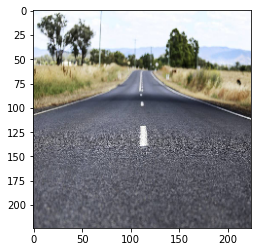

185.PotHolesLikePonds_large.jpg


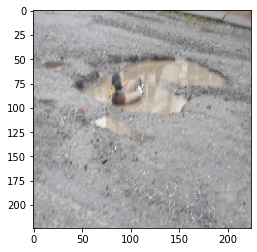

19.33339051544_6cfffc488f_b.jpg


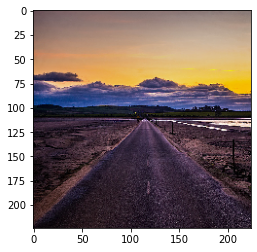

53._1_pothole_main.jpg


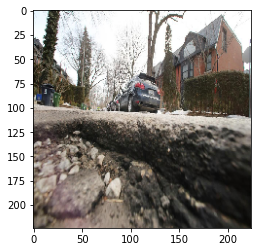

In [10]:
def show_pictures(path):
    random_img = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_img)
    print(random_img)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(img_tensor)
    plt.show()
    
for i in range(0,2):
    show_pictures(train_plain_dir)
    show_pictures(train_pothole_dir)

In [11]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

In [12]:
# Check architecture
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='binary')
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 420 images belonging to 2 classes.


C:\Users\DELL\anaconda3\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Found 140 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [14]:
# Debug
print(train_features)
print(train_labels)

[[[[2.96066105e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.43423343e-01 0.00000000e+00]
   [5.17864674e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.12696159e-01 0.00000000e+00]
   [1.53363347e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.08375061e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 9.89272296e-02 ... 0.00000000e+00
    7.55855143e-01 0.00000000e+00]
   [3.80672365e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.30457783e-01 0.00000000e+00]
   [2.61740148e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.13160717e-01 0.00000000e+00]]

  [[3.92346323e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    5.85386515e-01 0.00000000e+00]
   [1.61363766e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.52228975e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    8.46693635e-01 0.00000000e+00]
   ...
   [1.37703598e-01 0.00000000e+00 0.00000000e+00 ... 0.00

In [15]:
train_features.shape

(420, 7, 7, 512)

# Modeling

In [30]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.Flatten(input_shape=(7,7,512)))
model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [34]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
14/14 [==============================] - 1s 43ms/step - loss: 0.6104 - acc: 0.8024 - val_loss: 0.3622 - val_acc: 0.9286
Epoch 2/100
14/14 [==============================] - 0s 34ms/step - loss: 0.2576 - acc: 0.9214 - val_loss: 0.1674 - val_acc: 0.9429
Epoch 3/100
14/14 [==============================] - 0s 32ms/step - loss: 0.1248 - acc: 0.9667 - val_loss: 0.1801 - val_acc: 0.9500
Epoch 4/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0569 - acc: 0.9762 - val_loss: 0.1654 - val_acc: 0.9500
Epoch 5/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0144 - acc: 0.9952 - val_loss: 0.1446 - val_acc: 0.9500
Epoch 6/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.1479 - val_acc: 0.9571
Epoch 7/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0103 - acc: 0.9976 - val_loss: 0.1480 - val_acc: 0.9571
Epoch 8/100
14/14 [==============================] - 0s 34ms/step - loss: 0.

In [35]:
# Save model
model.save('pothole_fcl.h5')

# Model evaluation

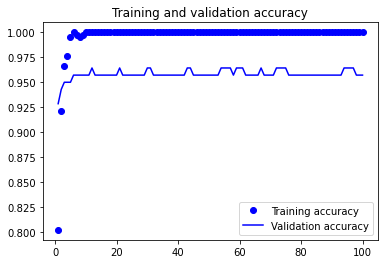

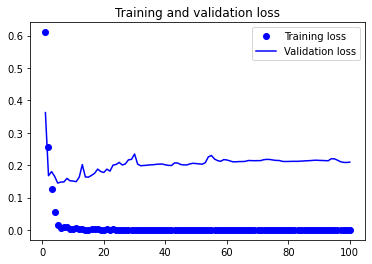

In [36]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Model in action

In [37]:
# Define function to visualize predictions
def visualize_predictions(classifier, n_cases):
    for i in range(0,n_cases):
        path = random.choice([test_plain_dir, test_pothole_dir])

        # Get picture
        random_img = random.choice(os.listdir(path))
        img_path = os.path.join(path, random_img)
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application

        # Extract features
        features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

        # Make prediction
        try:
            prediction = classifier.predict(features)
        except:
            prediction = classifier.predict(features.reshape(1, 7*7*512))

        # Show picture
        plt.imshow(img_tensor)
        plt.show()

        # Write prediction
        if prediction < 0.5:
            print('Plain')
        else:
            print('Pothole')

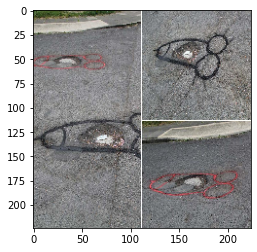

Pothole


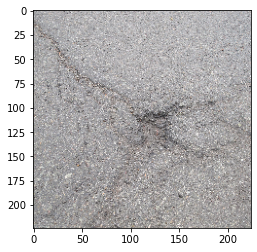

Pothole


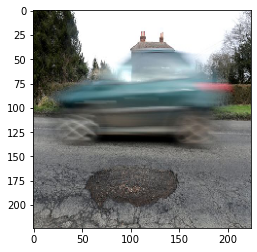

Pothole


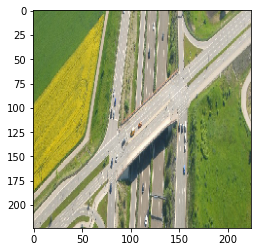

Plain


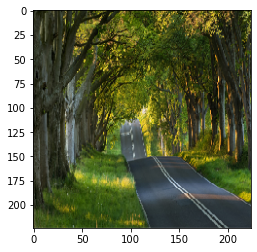

Plain


In [38]:
# Visualize predictions
visualize_predictions(model, 5)

# GLOBAL AVG POOLING

In [39]:
# Define model
from keras import models
from keras import layers
from keras import optimizers

epochs = 100

model = models.Sequential()
model.add(layers.GlobalAveragePooling2D(input_shape=(7,7,512)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile model
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['acc'])

In [41]:
# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
14/14 [==============================] - 0s 12ms/step - loss: 0.6988 - acc: 0.5095 - val_loss: 0.6777 - val_acc: 0.5714
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6439 - acc: 0.7429 - val_loss: 0.6474 - val_acc: 0.6857
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6124 - acc: 0.8214 - val_loss: 0.6164 - val_acc: 0.8143
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5811 - acc: 0.8405 - val_loss: 0.5901 - val_acc: 0.8357
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5526 - acc: 0.8952 - val_loss: 0.5661 - val_acc: 0.8357
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5263 - acc: 0.9095 - val_loss: 0.5425 - val_acc: 0.8429
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5018 - acc: 0.9119 - val_loss: 0.5216 - val_acc: 0.8571
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4792 - 

Epoch 63/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1576 - acc: 0.9571 - val_loss: 0.2232 - val_acc: 0.9357
Epoch 64/100
14/14 [==============================] - 0s 4ms/step - loss: 0.1559 - acc: 0.9571 - val_loss: 0.2241 - val_acc: 0.9286
Epoch 65/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1544 - acc: 0.9571 - val_loss: 0.2205 - val_acc: 0.9357
Epoch 66/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1528 - acc: 0.9571 - val_loss: 0.2199 - val_acc: 0.9286
Epoch 67/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1512 - acc: 0.9595 - val_loss: 0.2178 - val_acc: 0.9357
Epoch 68/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1495 - acc: 0.9595 - val_loss: 0.2158 - val_acc: 0.9357
Epoch 69/100
14/14 [==============================] - 0s 3ms/step - loss: 0.1482 - acc: 0.9595 - val_loss: 0.2162 - val_acc: 0.9357
Epoch 70/100
14/14 [==============================] - 0s 4ms/step - loss: 0.

In [42]:
# Save model
model.save('pothole_gap.h5')

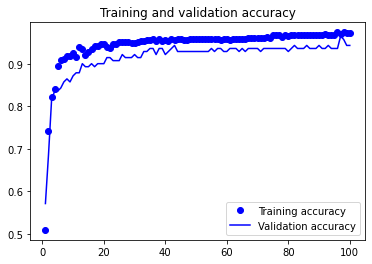

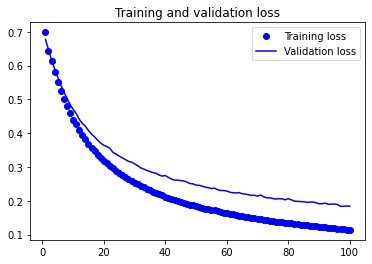

In [43]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

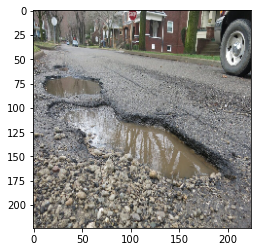

Pothole


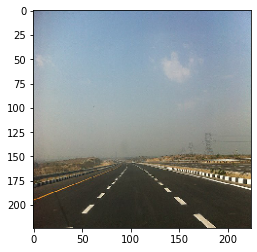

Plain


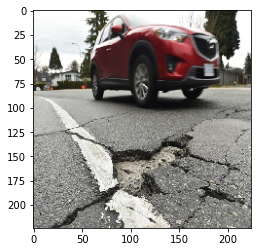

Pothole


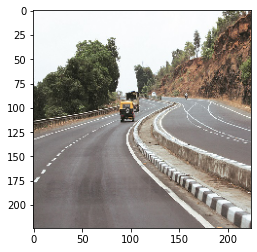

Plain


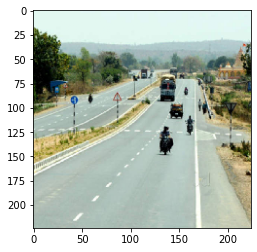

Plain


In [44]:
# Visualize predictions
visualize_predictions(model, 5)

# Linear support vector machine

In [45]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))

In [53]:
svm_features.shape

(560, 7, 7, 512)

In [51]:
# Build model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

X_train, y_train = svm_features.reshape(560,7*7*512), svm_labels

param = [{
          "C": [0.01, 0.1, 1, 10, 100]
         }]
 
svm = LinearSVC(penalty='l2', loss='squared_hinge')  # As in Tang (2013)
clf = GridSearchCV(svm, param, cv=10)
clf.fit(X_train, y_train)

ValueError: cannot reshape array of size 14049280 into shape (300,25088)

In [47]:
# Save model
model.save('pothole_svm.h5')

In [50]:
# Evaluate model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print("\nAccuracy score (mean):")
print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
print("\nAccuracy score (standard deviation):")
print(np.std(cross_val_score(clf, X_train, y_train, cv=10)))


Accuracy score (mean):


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

KeyboardInterrupt: 